Your client, age 45, wants to retire when his wealth exceeds £500,000. His current salary is £35,000, the cost of living of 6%, a savings rate of 6%, an interest rate of 2.0%, and a promotion every year at a promotion raise of 6%. Will your client be able to retire at age 65? To prepare your findings for presentation, you now need to summarise your results and visualise the change in wealth over time for the client. 

In [1]:
# Define classes to contain and encapsulate data.
from dataclasses import dataclass 
import pandas as pd

# Import in-built module for generating random numbers. 
import random 

# Display output inline.
%matplotlib inline

# Import to replicate a nested loop over the input values.
from sensitivity import SensitivityAnalyzer 

In [2]:
# Create a DataFrame consisting of various classes using Python's 'dataclass()'
# module and Object Oriented Programming (OPP).
@dataclass

class ModelInputs: 
    # Define the class and specify the default inputs. 
    starting_salary: int = 35000
    promos_every_n_years: int = 1
    cost_of_living_raise: float = 0.06
    promo_raise: float = 0.06
    savings_rate: float = 0.06
    interest_rate: float = 0.02
    desired_cash: int = 500000

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data 

ModelInputs(starting_salary=35000, promos_every_n_years=1, cost_of_living_raise=0.06, promo_raise=0.06, savings_rate=0.06, interest_rate=0.02, desired_cash=500000)

### a. Get the wage at a given year from the start of the model based on cost of living raises and regular promotions. (Hint: Use the equation on the previous page under 'Wages'.) 

In [4]:
# Get the wage at a given year from the start of the model based 
# on the cost of living raises and regular promotions.
def wages_year(data: ModelInputs, year):
    # Every n years we have a promotion, so dividing the years and
    # taking out the decimals gets the number of promotions.
    num_promos = int(year / data.promos_every_n_years)  
    
   # This is the formula above implemented in Python.
    salary_t = data.starting_salary * (1 + data.cost_of_living_raise)\
    ** year * (1 + data.promo_raise) ** num_promos
    return salary_t

In [5]:
# Show the first four salaries in the range and 
# print the results using the f-string.
for i in range(4):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f'The wage at year {year} is £{salary:,.0f}.')

The wage at year 1 is £39,326.
The wage at year 2 is £44,187.
The wage at year 3 is £49,648.
The wage at year 4 is £55,785.


### b. Calculate the cash saved within a given year. (Hint: First calculate the salary at that year, then apply the savings rate.) 

In [8]:
# Calculate the cash saved within a given year by first 
# calculating the salary at that year then applying the savings rate.
def cash_saved_during_year(data: ModelInputs, year):
    salary = wages_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved

### c. Calculate the accumulated wealth for a given year. (Hint: Base these on the previous wealth, the investment rate, and cash saved during the year.) 

In [9]:
# Calculate the accumulated wealth for a given year based
# on previous wealth, the investment rate, and cash saved during the year.
def wealth_year(data: ModelInputs, year, prior_wealth):
                cash_saved = cash_saved_during_year(data, year)
                wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
                return wealth

In [10]:
# Start with no cash saved.
prior_wealth = 0  
for i in range(4):
    year = i + 1
    wealth = wealth_year(model_data, year, prior_wealth)
    print(f'The accumulated wealth at year {year} is £{wealth:,.0f}.')
    
    # Set next year's prior wealth to this year's wealth:
    prior_wealth = wealth

The accumulated wealth at year 1 is £2,360.
The accumulated wealth at year 2 is £5,058.
The accumulated wealth at year 3 is £8,138.
The accumulated wealth at year 4 is £11,648.


### d. Calculate the years to retirement. (Hint: Use the while loop to run through each year, starting with no cash saved.) 

In [13]:
def years_to_retirement(data: ModelInputs, print_output=True):
    # Start with no cash saved.
    prior_wealth = 0  
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0  
   
    if print_output:
        print('Wealths over time:')
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_year(data, year, prior_wealth)
        if print_output:
            print(f'The accumulated wealth at year {year} is £{wealth:,.0f}.')
            # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth  
       
    # Now we have run the while loop, the wealth must be >= desired_cash 
    # (whatever last year was set is the years to retirement), which we can print.
    if print_output:
        # \n makes a blank line in the output.
        print(f'\nRetirement:\nIt will take {year} years to retire.')  
    return year

In [15]:
years = years_to_retirement(model_data)

Wealths over time:
The accumulated wealth at year 1 is £2,360.
The accumulated wealth at year 2 is £5,058.
The accumulated wealth at year 3 is £8,138.
The accumulated wealth at year 4 is £11,648.
The accumulated wealth at year 5 is £15,642.
The accumulated wealth at year 6 is £20,180.
The accumulated wealth at year 7 is £25,332.
The accumulated wealth at year 8 is £31,173.
The accumulated wealth at year 9 is £37,790.
The accumulated wealth at year 10 is £45,281.
The accumulated wealth at year 11 is £53,754.
The accumulated wealth at year 12 is £63,332.
The accumulated wealth at year 13 is £74,153.
The accumulated wealth at year 14 is £86,370.
The accumulated wealth at year 15 is £100,159.
The accumulated wealth at year 16 is £115,714.
The accumulated wealth at year 17 is £133,256.
The accumulated wealth at year 18 is £153,030.
The accumulated wealth at year 19 is £175,314.
The accumulated wealth at year 20 is £200,421.
The accumulated wealth at year 21 is £228,699.
The accumulated weal

In [16]:
# Runs the retirement model; collects salary and wealth information year by year
# and stores it in a DataFrame for further analysis.
def get_salaries_wealths_df(data):
    # Start with no cash saved.
    prior_wealth = 0   
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0  
    
    df_data_tups = []
    while wealth < data.desired_cash:
        year = year + 1
        salary = wages_year(data, year)
        wealth = wealth_year(data, year, prior_wealth)

        # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth 

        # Save the results in a tuple for later building the DataFrame.
        df_data_tups.append((year, salary, wealth))
        
    # Now we have run the while loop, so wealth must be >= desired_cash. 
    # Create the DataFrame.
    df = pd.DataFrame(df_data_tups, columns=['Year', 'Salary', 'Wealth'])
    
    return df

In [17]:
# Save the function results into the DataFrame.
results_df = get_salaries_wealths_df(model_data)

# View the DataFrame.
results_df.head(10)

,Year,Salary,Wealth
0,1,39326.000000,2359.560000
1,2,44186.693600,5057.952816
2,3,49648.168929,8138.002008
3,4,55784.682609,11647.843005
4,5,62679.669379,15641.580028
5,6,70426.876514,20180.024219
6,7,79131.638451,25331.523010
7,8,88912.308964,31172.892008
8,9,99901.870352,37790.462070
9,10,112249.741527,45281.255803


## Create Visualisation

<AxesSubplot:xlabel='Year'>

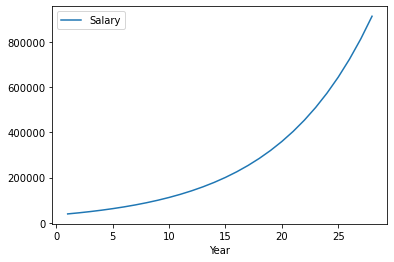

In [18]:
# Visualise wage or salary change over time.
results_df.plot('Year', 'Salary')

<AxesSubplot:xlabel='Year'>

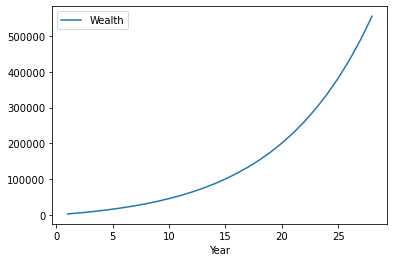

In [19]:
# Visualise wealth change over time.
results_df.plot('Year', 'Wealth')